# Evaluating Gene Correlations - Pancreatic epithelium

In [1]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import matplotlib.pyplot as plt


from moscot.problems.time._lineage import TemporalProblem

/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
Path="/home/mgander/moscot-framework_reproducibility/data/mouse_temporal"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']

In [3]:
ct='E11.5:Pancreatic epithelium'
i=16

ts0=ts[i]
ts1=ts[i+1]

In [4]:
gT=np.load(f"{Path}/TOME_maps_growth_rate_and_driver_genes_analysis/{ts0}_{ct}_pull.npy", allow_pickle=True)
gM=np.load(f"{Path}/moscot_maps_growth_rate_and_driver_genes_analysis/{ts0}_{ct}_pull.npy", allow_pickle=True)

# Correlation for curated genes

The following list of genes was obtained by litarture seach when looking for genes that predict deveopment into pancreatic epithelium cells. The key in the dictionary corresponds to the citation (Pubmed ID), and the values correspond to the genes the publication lists.

Be careful, I also listed driver/marker genes if there was only moderate evidence of them being directly involved in these cell transitions, so use this list with caution!!!

In [5]:
# Pancreas

D={}

D['PMID: 17202186']=['Ptf1a', 'Pdx1', 'Neurog3', 'Nkx6-1', 'Nkx2-2', 'Tle3']

D['PMID: 15604203']=['Neurog3', 'Pdx1', 'Slc2a2', 'Iapp', 'Gck', 'Mnx1', 'Hes1', 'Neurod1', 
                     'Pax4', 'Pax6', 'Nkx2-2', 'Nkx6-1', 'Bhlha15']

D['PMID: 15298336']=['Pdx1', 'Nkx2-2', 'Hnf1b', 'Ptf1a', 'Nkx6-1', 'Mnx1', 'Hhex', 'Onecut1', 'Foxa2', 
                     'Hes1', 'Mnx1', 'Ptf1a', 'Nr5a2', 'Neurod1', 'Pax4', 'Pax6', 'Hnf4a', 'Hnf1a']

D['PMID: 25063451']=['Nr5a2', 'Bhlha15', 'Ptf1a', 'Rbpjl']



D['PMID: 17202186, maybe']=['Slc2a2', 'Tle1', 'Tle2', 'Mafa', 'Mafb']

D['PMID: 15298336, maybe']=['Irs2', 'Foxo1', 'Mafa', 'Mafb', 'Gck', 'Iapp', 'Pklr']


D['PMID: 25063451, maybe'] = ['Myc', 'Gata4']

D['Moscot pancreas multiome analysis']=['Btbd17', 'Cadm1', 'Ccdc34', 'Cck', 'Cel', 'Cox7a2l', 'Dctn3', 'Fev', 'Gadd45a', 'Gcg', 'Ghrl', 'Hes6', 'Hhex', 'Ins2', 'Kif11', 'Mki67', 'Nav2', 'Neurod1', 'Neurog3', 'Npepl1', 'Pclo', 'Ppp3ca', 'Ptf1a', 'Rbpjl', 'Reep5', 'Sox9', 'Spp1', 'Sst', 'Tox3', 'Ubl3Arx', 'Yipf4', 'Zwint']

D['PMID: 30254276']=['Reep5', 'Btbd17', 'Gng12', 'Peg10', 'Sst', 'Ngn3', 'Fev', 'Pax4']

D['PMID: 27318360']=['Anxa2']

D['PMID: 18471525']=['Cadm1']

genes=[]
for a in D.values():
    genes=[*genes, *a]

# Eliminate duplicates
genes=[a for a in set(genes)]

In [6]:
adata=sc.read(f"{Path}/anndatas/scVI_anndatas/scvi_adata_{ts0}_6k_hvgs.h5ad")
adata.var.index=list(adata.var['gene_names'])

In [7]:
if 14>i>4:
    ExE_cell_types=['Embryonic visceral endoderm', 'Extraembryonic visceral endoderm', 'Parietal endoderm', 'Extraembryonic ectoderm', 'Primitive erythroid cells', 'Blood progenitors']
    adata=adata[~adata.obs['cell_type'].isin(ExE_cell_types)].copy()
elif i>4:
    ExE_cell_types=['Extraembryonic visceral endoderm']
    adata=adata[~adata.obs['cell_type'].isin(ExE_cell_types)].copy()

/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
hvgs=list(adata.var[adata.var['highly_variable']]['gene_names'])
genes_selected=[]
for gene in genes:
    if gene in hvgs:
        genes_selected.append(gene)

In [13]:
len(genes_selected)

24

In [14]:
[print(a) for a in sorted(genes_selected)]

Btbd17
Cadm1
Cck
Cel
Foxa2
Gadd45a
Gata4
Gcg
Gck
Ghrl
Hes6
Hnf1a
Irs2
Mafb
Mnx1
Nav2
Neurod1
Nkx2-2
Nkx6-1
Nr5a2
Onecut1
Spp1
Sst
Tox3


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [11]:
subset=True

DF=pd.DataFrame({})

for gene in genes_selected:
    loc=adata.var.index.get_loc(gene)
    exp=adata.layers['scvi_normalized'][:,loc]
    #exp=adataS.X[:,loc]
    #exp=np.array(exp.todense()).T[0]

    if subset==True:
        wh=np.where(adata.obs['cell_state']=='E10.5:Gut and lung epithelium')[0]
        exp=exp[wh]
        gT2=gT[wh]
        gM2=gM[wh]
    else:
        gT2=gT.copy()
        gM2=gM.copy()


    (cor, p)=scipy.stats.spearmanr(exp, gT2)
    dfT=pd.DataFrame({'Timepoint': ts0, 'Gene':[gene], 'Method': 'TOME', 'Correlation':cor, 'P-value':p, 'type':'Spearman'})
    (cor, p)=scipy.stats.spearmanr(exp, gM2)
    dfM=pd.DataFrame({'Timepoint': ts0, 'Gene':[gene], 'Method': 'moscot', 'Correlation':cor, 'P-value':p, 'type':'Spearman'})
    DF=pd.concat([DF, dfM,dfT])
DF['Abs. Correlation']=abs(DF['Correlation'])
DF.index=np.arange(len(DF))

<Axes: xlabel='Abs. Correlation', ylabel='Timepoint'>

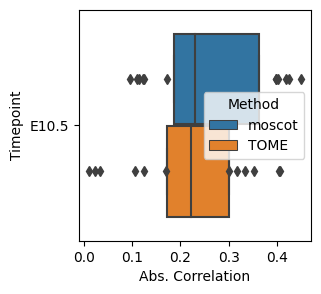

In [12]:
fig, ax = plt.subplots(ncols=1, figsize=(3, 3))
sns.boxplot(data=DF, x="Abs. Correlation", y="Timepoint", hue='Method', showfliers=True,
               showmeans=False,  whis=[100,0], ax=ax)

In [43]:
DF.to_pickle(f'{Path}/Validation_output/{ts0}_PE.npy')